# **Taller de Python**
## Profesor: Juan S. Moreno P. y Julián Chitiva

# Clase 9: Pandas III y visualización

In [1]:
import pandas as pd
import numpy as np

## Importación y exportación de datos

1. Cargue los datos de *info_accidentes.csv*. Realice una exploración básica de los datos.

In [2]:
accidentes= pd.read_csv('info_accidentes.csv')
print(accidentes.shape)
accidentes.head()

(34931, 25)


,Fecha,GravedadNombre,ClaseNombre,ChoqueNombre,ObjetoFijoCodigo,ObjetoFijoNombre,OtraClase,NombreOtraClase,Latitud,Longitud,...,TipoVia2,NumeroVia2,LetraVia2,CardinalVia2,Localidad,HoraOcurrencia,TipoDiseño,TipoTiempo,TotalMuertos,TotalHeridos
0,01/13/2016 12:00:00 AM,Con Heridos,Choque,Vehiculo,,,,,0.0,0.0,...,CL,83.0,,,ENGATIVA,12/31/1899 10:30:00 PM,Interseccion,Normal,0,2
1,01-12-16 0:00,Con Heridos,Atropello,,,,,,0.0,0.0,...,KR,7.0,,,USAQUEN,12/31/1899 03:40:00 PM,Interseccion,Normal,0,1
2,01/13/2016 12:00:00 AM,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,KR,5.0,,E,SAN CRISTOBAL,12/31/1899 07:20:00 AM,Tramo de Via,Normal,0,0
3,01/17/2016 12:00:00 AM,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,KR,107.0,,,ENGATIVA,12/31/1899 06:10:00 AM,Tramo de Via,Normal,0,0
4,01/18/2016 12:00:00 AM,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,CL,48.0,,S,RAFAEL URIBE URIBE,12/31/1899 05:00:00 PM,Tramo de Via,Normal,0,0


4. Cambie Fecha a formato datetime

In [3]:
accidentes['Fecha'].head()

0    01/13/2016 12:00:00 AM
1             01-12-16 0:00
2    01/13/2016 12:00:00 AM
3    01/17/2016 12:00:00 AM
4    01/18/2016 12:00:00 AM
Name: Fecha, dtype: object

In [4]:
accidentes['Fecha']=pd.to_datetime(accidentes['Fecha'])

In [5]:
accidentes['Fecha'].head()

0   2016-01-13
1   2016-01-12
2   2016-01-13
3   2016-01-17
4   2016-01-18
Name: Fecha, dtype: datetime64[ns]

5. Construya las variables mes y dia con base en el dia y mes de la fecha. 
Explore el locale español (Unix (mac/linux): es_ES.UTF-8, Windows: spanis_SPAIN.1252)

In [6]:
accidentes['mes']=accidentes.Fecha.dt.month_name(locale='es_ES.UTF-8')
accidentes['dia']=accidentes.Fecha.dt.day_name(locale='es_ES.UTF-8')

6. Convierta las variables en categóricas para que pueda ordenarlas como desee.

In [7]:
accidentes['dia'] = pd.Categorical(accidentes.dia, 
                                   ['Lunes','Martes','Miércoles','Jueves',
                                    'Viernes','Sábado','Domingo'])

In [8]:
accidentes['mes'] = pd.Categorical(accidentes.mes, 
                                   ['Enero','Febrero','Marzo','Abril','Mayo','Junio',
                                    'Julio','Agosto','Septiembre','Octubre',
                                    'Noviembre','Diciembre'])

7. ¿Cuántos accidentes hubo por mes? ¿Cuántos muertos y heridos? Para agrupar se utiliza el comando [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). 

In [9]:
accidentes.groupby(['mes']).size()

mes
Enero         2074
Febrero       2586
Marzo         2671
Abril         2951
Mayo          3130
Junio         2911
Julio         2879
Agosto        3062
Septiembre    3136
Octubre       3274
Noviembre     3316
Diciembre     2941
dtype: int64

In [10]:
accidentes.groupby(['mes'])[['TotalMuertos','TotalHeridos']].sum()

,TotalMuertos,TotalHeridos
mes,,
Enero,50,1016
Febrero,38,1121
Marzo,53,1149
Abril,45,1211
Mayo,52,1259
Junio,57,1237
Julio,47,1189
Agosto,55,1276
Septiembre,48,1312


8. ¿Cuántos accidentes hubo por día de la semana? ¿Cuántos muertos y heridos?

In [11]:
accidentes.groupby(['dia']).size()

dia
Lunes        4878
Martes       5438
Miércoles    5233
Jueves       5152
Viernes      5583
Sábado       5267
Domingo      3380
dtype: int64

In [12]:
accidentes.groupby(['dia'])[['TotalMuertos','TotalHeridos']].sum()

,TotalMuertos,TotalHeridos
dia,,
Lunes,72,2077
Martes,74,2222
Miércoles,94,2063
Jueves,88,2150
Viernes,81,2186
Sábado,82,2095
Domingo,84,1644


9. ¿Cuántos accidentes hubo por día de la semana proporcionalmente? ¿Cuántos muertos y heridos?

In [13]:
accidentes_dia = accidentes.groupby(['dia'])[['TotalMuertos','TotalHeridos']].sum()
accidentes_dia / accidentes_dia.sum()

,TotalMuertos,TotalHeridos
dia,,
Lunes,0.125217,0.143866
Martes,0.128696,0.153910
Miércoles,0.163478,0.142897
Jueves,0.153043,0.148923
Viernes,0.140870,0.151416
Sábado,0.142609,0.145113
Domingo,0.146087,0.113874


10. Usando `groupby`, encuentre el cuantos accidentes hubo por día de la semana en cada mes

In [14]:
accidentes.groupby(['mes','dia'])[['TotalMuertos','TotalHeridos']].sum().head()

TotalMuertos  TotalHeridos
mes   dia                                  
Enero Lunes                 2           150
      Martes                6           130
      Miércoles             7           147
      Jueves                5           125
      Viernes              10           173

11. Sin usar Groupby, encuentre el cuantos accidentes hubo por día de la semana en cada mes

In [15]:
pd.crosstab(index=accidentes.mes, columns=accidentes.dia)

dia,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo
mes,,,,,,,
Enero,267,316,300,266,361,330,234
Febrero,449,375,397,348,378,394,245
Marzo,327,461,469,414,387,372,241
Abril,410,406,382,411,574,493,275
Mayo,476,555,425,451,445,448,330
Junio,359,422,515,497,424,413,281
Julio,361,431,378,386,520,480,323
Agosto,504,569,501,408,431,409,240
Septiembre,428,422,423,554,600,408,301


12. Construya las columnas que representen la dummy de día de la semana

In [16]:
accidentes_dummies = pd.get_dummies(accidentes, columns=['dia'])
accidentes_dummies.head()

,Fecha,GravedadNombre,ClaseNombre,ChoqueNombre,ObjetoFijoCodigo,ObjetoFijoNombre,OtraClase,NombreOtraClase,Latitud,Longitud,...,TotalMuertos,TotalHeridos,mes,dia_Lunes,dia_Martes,dia_Miércoles,dia_Jueves,dia_Viernes,dia_Sábado,dia_Domingo
0,2016-01-13,Con Heridos,Choque,Vehiculo,,,,,0.0,0.0,...,0,2,Enero,0,0,1,0,0,0,0
1,2016-01-12,Con Heridos,Atropello,,,,,,0.0,0.0,...,0,1,Enero,0,1,0,0,0,0,0
2,2016-01-13,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,0,0,Enero,0,0,1,0,0,0,0
3,2016-01-17,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,0,0,Enero,0,0,0,0,0,0,1
4,2016-01-18,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,0,0,Enero,1,0,0,0,0,0,0


13. Construya una nueva base que tenga los meses en las columnas, los días en las filas y en cada entrada de la base el Total de heridos

In [17]:
pd.pivot_table(data=accidentes,
               index='dia', 
               columns='mes',
               values='TotalHeridos',
               aggfunc=sum)

mes,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
dia,,,,,,,,,,,,
Lunes,150,185,143,216,206,139,160,189,174,222,148,145
Martes,130,156,186,152,223,173,174,251,186,210,233,148
Miércoles,147,150,180,151,173,244,124,191,175,198,191,139
Jueves,125,171,215,181,148,185,167,151,238,212,188,169
Viernes,173,167,158,206,166,190,211,191,235,157,176,156
Sábado,162,162,124,186,190,170,199,173,174,231,144,180
Domingo,129,130,143,119,153,136,154,130,130,166,141,113


14. Construya una nueva base que tenga los meses en las columnas, los días en las filas y entradas que tengan el Total de heridos y muertos, su media y desviación estándar.

In [18]:
pd.pivot_table(data=accidentes,
               index='dia', 
               columns='mes',
               values=['TotalHeridos','TotalMuertos'],
               aggfunc=[sum, np.mean, np.std])

sum                                                         \
          TotalHeridos                                                          
mes              Enero Febrero Marzo Abril Mayo Junio Julio Agosto Septiembre   
dia                                                                             
Lunes              150     185   143   216  206   139   160    189        174   
Martes             130     156   186   152  223   173   174    251        186   
Miércoles          147     150   180   151  173   244   124    191        175   
Jueves             125     171   215   181  148   185   167    151        238   
Viernes            173     167   158   206  166   190   211    191        235   
Sábado             162     162   124   186  190   170   199    173        174   
Domingo            129     130   143   119  153   136   154    130        130   

                   ...          std                                          \
                   ... TotalMuertos                                           
mes       Octubre  ...        Marzo     Abril      Mayo     Junio     Julio   
dia                ...                                                        
Lunes         222  ...     0.122894  0.146703  0.091380  0.138462  0.117557   
Martes        210  ...     0.130727  0.110425  0.139506  0.097011  0.135127   
Miércoles     198  ...     0.171051  0.124502  0.166574  0.123784  0.072643   
Jueves        212  ...     0.175412  0.154953  0.155066  0.177972  0.123864   
Viernes       157  ...     0.113075  0.083260  0.115461  0.152590  0.144036   
Sábado        231  ...     0.126141  0.141638  0.105171  0.161208  0.143522   
Domingo       166  ...     0.180862  0.133852  0.164025  0.177539  0.164838   

                                                              
                                                              
mes          Agosto Septiembre   Octubre Noviembre Diciembre  
dia                                                           
Lunes      0.176170   0.068279  0.108994  0.157820  0.111104  
Martes     0.118208   0.145265  0.133611  0.078566  0.100247  
Miércoles  0.140003   0.118391  0.129083  0.114377  0.133611  
Jueves     0.130015   0.133255  0.091095  0.130392  0.129353  
Viernes    0.135127   0.081445  0.146458  0.086791  0.079056  
Sábado     0.110023   0.120521  0.102146  0.093759  0.133347  
Domingo    0.143125   0.203622  0.148831  0.115079  0.151295  

[7 rows x 72 columns]

15. Construya en la base accidentes la columna que indique si es fin de semana o no.

In [19]:
accidentes['fds']=accidentes.dia.isin(['Sábado','Domingo'])

16. Muestre el número de accidentes por si fue en fin de semana, tipo de tiempo y Gravedad del accidente

In [20]:
accidentes.GravedadNombre

0        Con Heridos
1        Con Heridos
2         Solo Daños
3         Solo Daños
4         Solo Daños
            ...     
34926    Con Heridos
34927     Solo Daños
34928     Solo Daños
34929     Solo Daños
34930    Con Heridos
Name: GravedadNombre, Length: 34931, dtype: object

In [21]:
accidentes.groupby(['fds','TipoTiempo','GravedadNombre']).size()

fds    TipoTiempo     GravedadNombre
False                 Con Heridos           3
                      Solo Daños            6
       Lluvia         Con Heridos         212
                      Con Muertos          11
                      Solo Daños          734
       Lluvia/Lluvia  Con Heridos           2
       Lluvia/Normal  Con Heridos           1
                      Solo Daños            4
       Niebla         Con Heridos           8
                      Solo Daños           20
       Normal         Con Heridos        7644
                      Con Muertos         384
                      Solo Daños        17209
       Normal/Lluvia  Solo Daños            2
       Normal/Normal  Con Heridos           4
                      Solo Daños            3
       Viento         Con Heridos          14
                      Solo Daños           22
       Viento/Normal  Solo Daños            1
True                  Solo Daños            1
       Lluvia         Con Heridos          

In [22]:
pd.crosstab(index=[accidentes.fds,accidentes.TipoTiempo], 
            columns=accidentes.GravedadNombre)

GravedadNombre       Con Heridos  Con Muertos  Solo Daños
fds   TipoTiempo                                         
False                          3            0           6
      Lluvia                 212           11         734
      Lluvia/Lluvia            2            0           0
      Lluvia/Normal            1            0           4
      Niebla                   8            0          20
      Normal                7644          384       17209
      Normal/Lluvia            0            0           2
      Normal/Normal            4            0           3
      Viento                  14            0          22
      Viento/Normal            0            0           1
True                           0            0           1
      Lluvia                  64            1         192
      Lluvia/Normal            0            0           2
      Niebla                   4            0           3
      Normal                2598          159        5613
      Normal/Normal            2            0           1
      Viento                   2            0           5

17. Ordene la base por mes, día de la semana, número de heridos y número de muertos

In [23]:
accidentes.sort_values(['mes','dia','TotalMuertos','TotalHeridos'],
                       ascending=[True, True, False, False])

,Fecha,GravedadNombre,ClaseNombre,ChoqueNombre,ObjetoFijoCodigo,ObjetoFijoNombre,OtraClase,NombreOtraClase,Latitud,Longitud,...,CardinalVia2,Localidad,HoraOcurrencia,TipoDiseño,TipoTiempo,TotalMuertos,TotalHeridos,mes,dia,fds
9059,2016-01-25,Con Muertos,Caida de ocupante,,,,,,45.897,-741.244,...,,RAFAEL URIBE URIBE,12/31/1899 07:00:00 AM,Tramo de Via,Normal,1,0,Enero,Lunes,False
28598,2016-01-25,Con Muertos,Atropello,,,,,,0.000,0.000,...,,BOSA,12/31/1899 12:20:00 AM,Tramo de Via,Normal,1,0,Enero,Lunes,False
22207,2016-01-18,Con Heridos,Choque,Vehiculo,,,,,0.000,0.000,...,,CHAPINERO,12/31/1899 05:20:00 AM,Interseccion,Normal,0,14,Enero,Lunes,False
26467,2016-01-04,Con Heridos,Choque,Vehiculo,,,,,0.000,0.000,...,,LOS MARTIRES,12/31/1899 11:50:00 AM,Interseccion,Normal,0,5,Enero,Lunes,False
13386,2016-01-25,Con Heridos,Choque,Vehiculo,,,,,0.000,0.000,...,,USAQUEN,12/31/1899 10:30:00 AM,Tramo de Via,Normal,0,4,Enero,Lunes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34669,2016-12-04,Solo Daños,Choque,Vehiculo,,,,,0.000,0.000,...,,PUENTE ARANDA,12/31/1899 10:45:00 AM,Glorieta,Normal,0,0,Diciembre,Domingo,True
34695,2016-12-11,Solo Daños,Choque,Vehiculo,,,,,0.000,0.000,...,,FONTIBON,12/31/1899 10:15:00 AM,Interseccion,Normal,0,0,Diciembre,Domingo,True
34716,2016-12-11,Solo Daños,Choque,Vehiculo,,,,,0.000,0.000,...,,KENNEDY,12/31/1899 08:30:00 PM,Tramo de Via,Normal,0,0,Diciembre,Domingo,True
34748,2016-12-04,Solo Daños,Choque,Vehiculo,,,,,0.000,0.000,...,,KENNEDY,12/31/1899 12:10:00 AM,Interseccion,Normal,0,0,Diciembre,Domingo,True


# Clase 9.2: Más exploración y Visualización de datos

**El día de hoy trabajaremos con las bases de datos de E-commerce de ventas de [Olist](https://olist.com/) en Brasil. Acceda esta base de datos se encuentra en [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce).**

### Manipulación
1. Importe la base de datos olist_customers_dataset.csv para obtener los directorios de clientes.
2. Importe la base de datos olist_geolocation_dataset.csv para obtener la información espacial de [Brasil](https://es.wikipedia.org/wiki/Geograf%C3%ADa_de_Brasil#/media/Archivo:Brasil_administrative_map_ES.png).
3. Importe la base de datos olist_order_payments_dataset.csv para obtener información sobre los pagos.
4. Importe la base de datos olist_order_items_dataset.csv para obtener la información de los productos vendidos.
5. Importe la base de datos olist_products_dataset.csv para obtener información de los productos.
6. Importe la base de datos olist_sellers_dataset.csv para obtener la información de los vendedores.
7. Importe la base de datos olist_orders_dataset.csv para obtener información de las entregas.
8. Importe la base de datos product_category_name_translation.csv para traducir a inglés los tipos de productos

Explore que variables y que tamaño tienen las bases anteriores. Use los métodos ___unique()___, ___nunique()___ e ___isin()___ para explorar las bases y su relación con otras.

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
clientes=pd.read_csv('brazilian-ecommerce/olist_customers_dataset.csv')
print(clientes.shape)
clientes.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [26]:
geo_brasil=pd.read_csv('brazilian-ecommerce/olist_geolocation_dataset.csv')
print(geo_brasil.shape)
geo_brasil.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [27]:
pagos=pd.read_csv('brazilian-ecommerce/olist_order_payments_dataset.csv' )
print(pagos.shape)
pagos.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [28]:
ventas=pd.read_csv('brazilian-ecommerce/olist_order_items_dataset.csv' )
print(ventas.shape)
ventas.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [29]:
productos=pd.read_csv('brazilian-ecommerce/olist_products_dataset.csv' )
print(productos.shape)
productos.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [30]:
vendedores=pd.read_csv('brazilian-ecommerce/olist_sellers_dataset.csv' )
print(vendedores.shape)
vendedores.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [31]:
entregas=pd.read_csv('brazilian-ecommerce/olist_orders_dataset.csv' )
print(entregas.shape)
entregas.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [32]:
traduccion=pd.read_csv('brazilian-ecommerce/product_category_name_translation.csv')
print(traduccion.shape)
traduccion.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Estadísticas Descriptivas
1. ¿Qué producto fue el más vendido? ¿Qué tipo de producto es?

In [33]:
mas_vendido=ventas.product_id.value_counts().index[0]
productos.loc[productos.product_id== mas_vendido,'product_category_name']

13430    moveis_decoracao
Name: product_category_name, dtype: object

2. Pegue a la tabla de productos la traducción

In [34]:
productos = productos.merge(traduccion)

In [35]:
productos.loc[productos.product_id== mas_vendido,'product_category_name_english']

9181    furniture_decor
Name: product_category_name_english, dtype: object

3. ¿Cuánto se gastó en promedio por compra?

In [36]:
ventas.groupby('order_id')['price'].sum().mean()

137.7540763788945

4. ¿Cómo se distribuyo el tipo de pago? [(PIE)](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.pie.html)

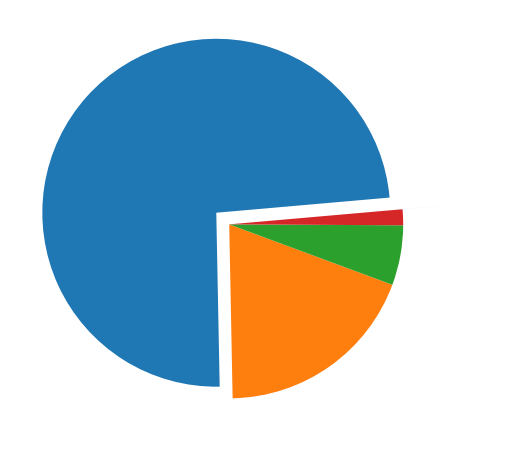

In [37]:
tipos_pago=pagos.payment_type.value_counts(normalize=True)
plt.figure(figsize=(8,8))
plt.pie(tipos_pago, labels=tipos_pago.index, 
        explode=(0.1,0,0,0,0.2),
        startangle=5, 
        textprops={'color':'w', 'fontsize':'12'});

5. ¿Cuánto se gastó en promedio por tipo de producto? [(Barras)](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)

In [38]:
ventas=ventas.merge(productos, on='product_id') # Tengo que juntar ventas y productos
promedio_por_producto=ventas.groupby('product_category_name_english')['price'].mean()# Con groupby se puede estudiar el promedio por tipo de producto

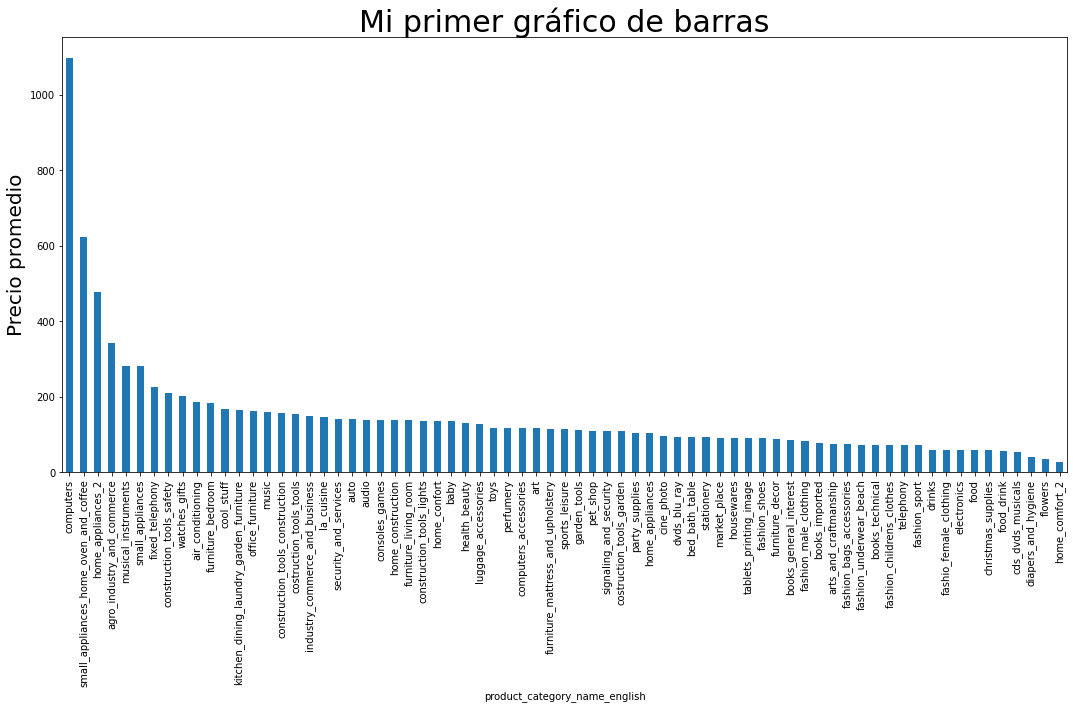

In [39]:
# Mezclamos los plot de pandas y los de matplotlib
promedio_por_producto.sort_values(ascending=False).plot(kind='bar', figsize=(18,8))
plt.ylabel('Precio promedio', fontsize=20)
plt.title('Mi primer gráfico de barras', fontsize=30);

6. ¿Cómo se distribuye el volumen de ventas por tipo de producto?

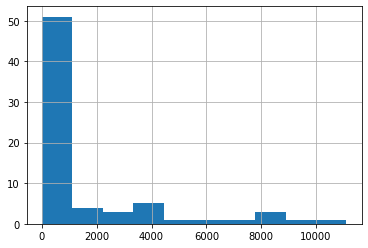

In [40]:
cantidades_productos=ventas.groupby('product_category_name_english').size() # Cantidad de ventas por productos
cantidades_productos.sort_values(ascending=False) # Distribución 
cantidades_productos.hist()